In [4]:
library(tidyverse)
library(ggplot2)
library(rvest)
library(plyr)
library(gganimate)
library(polite)

In [7]:
url <- 'https://www.statsf1.com/en/2022/italie/tour-par-tour.aspx'
url <- bow(url)
page <- scrape(url, query=list(t="semi-soft", per_page=100))

In [9]:
scores_df <- page %>% html_node('.datatable') %>% html_table(header = FALSE)

In [10]:
scores_df_header <- page %>% html_node('.datatable') %>% html_table(header = TRUE)

In [11]:
names <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_text()

In [12]:
names <- names[-1]

In [13]:
names

[1] "LEC" "RUS" "NOR" "RIC" "GAS" "ALO" "VER" "DEV" "ZHO" "LAT" "VET" "STR"
[13] "PER" "OCO" "BOT" "MAG" "MSC" "SAI" "HAM" "TSU"

In [53]:
names_pos <- 1:length(names)

In [54]:
names_pos

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [16]:
namespos <- as.character(as.vector(scores_df[1, ]))

In [17]:
namespos <- namespos[-1]


In [18]:
namespos

[1] "LEC1"  "RUS2"  "NOR3"  "RIC4"  "GAS5"  "ALO6"  "VER7"  "DEV8"  "ZHO9" 
[10] "LAT10" "VET11" "STR12" "PER13" "OCO14" "BOT15" "MAG16" "MSC17" "SAI18"
[19] "HAM19" "TSU20"

In [52]:
names_pos

[1] 0 0

In [20]:
scores_df_header

,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,...,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LEC,RUS,RIC,VER,GAS,NOR,ALO,DEV,ZHO,...,STR,MAG,OCO,LAT,PER,SAI,MSC,TSU,HAM,BOT
2,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,LAT,PER,TSU,HAM,MSC,BOT
3,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,PER,LAT,TSU,HAM,MSC,BOT
4,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,SAI,PER,MAG,LAT,TSU,HAM,MSC,BOT
5,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,SAI,VET,OCO,PER,MAG,LAT,TSU,HAM,MSC,BOT
6,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,STR,VET,PER,OCO,MAG,LAT,TSU,HAM,MSC,BOT
7,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,STR,VET,OCO,MAG,TSU,LAT,HAM,PER,MSC,BOT
8,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,SAI,...,STR,VET,OCO,TSU,MAG,HAM,LAT,MSC,BOT,PER
9,LEC,VER,RUS,RIC,GAS,NOR,ALO,SAI,DEV,...,STR,VET,OCO,TSU,HAM,MAG,LAT,MSC,BOT,PER


In [21]:
item = ''
for (item in namespos){
a <- scores_df_header %>% pull(LEC1)
a <- mapvalues(scores_df_header$LEC1, from = names, to=names_pos)
}

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU


In [22]:
names

[1] "LEC" "RUS" "NOR" "RIC" "GAS" "ALO" "VER" "DEV" "ZHO" "LAT" "VET" "STR"
[13] "PER" "OCO" "BOT" "MAG" "MSC" "SAI" "HAM" "TSU"

In [23]:
item <- 'LEC1'
scores_df_header$item

Warning message:
"Unknown or uninitialised column: `item`."


NULL

In [131]:
item <- "LEC1"

In [133]:
collect(select(scores_df_header, LEC1))[, 1]

LEC1
<chr>
LEC
LEC
LEC
LEC
LEC
LEC
LEC
LEC
LEC


In [510]:
a <- scores_df_header %>% pull(LEC1)

In [511]:
a <- scores_df_header %>% pull(LEC1)

In [512]:
a

[1] "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "VER"
[13] "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER"
[25] "VER" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "VER" "VER" "VER"
[37] "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER"
[49] "VER" "VER" "VER" "VER" "VER"

In [513]:
a <- mapvalues(a, from = names, to= names_pos)

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU



In [514]:
a

[1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "7" "7" "7" "7" "7" "7" "7" "7"
[20] "7" "7" "7" "7" "7" "7" "1" "1" "1" "1" "1" "1" "1" "1" "7" "7" "7" "7" "7"
[39] "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7"

In [25]:
scores_df_header %>% head()

,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,⋯,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LEC,RUS,RIC,VER,GAS,NOR,ALO,DEV,ZHO,⋯,STR,MAG,OCO,LAT,PER,SAI,MSC,TSU,HAM,BOT
2,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,⋯,VET,OCO,MAG,SAI,LAT,PER,TSU,HAM,MSC,BOT
3,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,⋯,VET,OCO,MAG,SAI,PER,LAT,TSU,HAM,MSC,BOT
4,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,⋯,VET,OCO,SAI,PER,MAG,LAT,TSU,HAM,MSC,BOT
5,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,⋯,SAI,VET,OCO,PER,MAG,LAT,TSU,HAM,MSC,BOT
6,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,⋯,STR,VET,PER,OCO,MAG,LAT,TSU,HAM,MSC,BOT


In [26]:
scores_df_header[['LEC1']]

[1] "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "VER"
[13] "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER"
[25] "VER" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "LEC" "VER" "VER" "VER"
[37] "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER" "VER"
[49] "VER" "VER" "VER" "VER" "VER"

In [496]:
names %>% length()

[1] 20

In [50]:
names_pos <- append(names_pos, 0)

In [51]:
names_pos %>% length

[1] 2

In [26]:
scores_df_header

,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,...,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LEC,RUS,RIC,VER,GAS,NOR,ALO,DEV,ZHO,...,STR,MAG,OCO,LAT,PER,SAI,MSC,TSU,HAM,BOT
2,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,LAT,PER,TSU,HAM,MSC,BOT
3,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,PER,LAT,TSU,HAM,MSC,BOT
4,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,SAI,PER,MAG,LAT,TSU,HAM,MSC,BOT
5,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,SAI,VET,OCO,PER,MAG,LAT,TSU,HAM,MSC,BOT
6,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,STR,VET,PER,OCO,MAG,LAT,TSU,HAM,MSC,BOT
7,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,STR,VET,OCO,MAG,TSU,LAT,HAM,PER,MSC,BOT
8,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,SAI,...,STR,VET,OCO,TSU,MAG,HAM,LAT,MSC,BOT,PER
9,LEC,VER,RUS,RIC,GAS,NOR,ALO,SAI,DEV,...,STR,VET,OCO,TSU,HAM,MAG,LAT,MSC,BOT,PER


In [27]:
namespos

[1] "LEC1"  "RUS2"  "NOR3"  "RIC4"  "GAS5"  "ALO6"  "VER7"  "DEV8"  "ZHO9" 
[10] "LAT10" "VET11" "STR12" "PER13" "OCO14" "BOT15" "MAG16" "MSC17" "SAI18"
[19] "HAM19" "TSU20"

In [47]:
names_pos <- names_pos[21]

In [49]:
names_pos

[1] 0

In [55]:
for (item in namespos){
    scores_df_header[[item]] <- mapvalues(scores_df_header[[item]], from=names, to=names_pos)
}

The following `from` values were not present in `x`: RUS, NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: NOR, RIC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: NOR, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, HAM, TSU

The following `from` values were not present in `x`: LEC, GAS, ALO, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, HAM, TSU

The following `from` values were not present in `x`: LEC, RUS, ALO, VER, DEV, ZHO, LAT, VET, STR, OCO, BOT, MAG, MSC, TSU

The following `from` values were not present in `x`: LEC, RUS, VER, DEV, ZHO, LAT, VET, STR, OCO, BOT, MAG, MSC, TSU

The following `from` values were not present in `x`: LEC, RUS, GAS, VER, DEV, ZHO, LAT, VET, STR, OCO, MAG, MSC, TSU

The following `from` values were not present in `x`: LEC, RUS, VER, ZHO, LAT, VET, STR, OCO, MAG, TSU

T

In [56]:
scores_df_header %>% tail()

,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,...,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
48,7,1,2,18,19,13,3,5,8,...,14,17,15,20,10,16,,,,
49,7,1,2,18,19,13,3,5,8,...,14,17,15,20,10,16,,,,
50,7,1,2,18,19,13,3,5,8,...,14,17,15,20,10,16,,,,
51,7,1,2,18,19,13,3,5,8,...,14,17,15,20,10,16,,,,
52,7,1,2,18,19,13,3,5,8,...,14,17,15,20,10,16,,,,
53,7,1,2,18,19,13,3,5,8,...,14,17,,,,,,,,


In [57]:
scores_df %>% head()

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,...,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
1,LEC,RUS,RIC,VER,GAS,NOR,ALO,DEV,ZHO,...,STR,MAG,OCO,LAT,PER,SAI,MSC,TSU,HAM,BOT
2,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,LAT,PER,TSU,HAM,MSC,BOT
3,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,PER,LAT,TSU,HAM,MSC,BOT
4,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,SAI,PER,MAG,LAT,TSU,HAM,MSC,BOT
5,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,SAI,VET,OCO,PER,MAG,LAT,TSU,HAM,MSC,BOT


In [58]:
laps <- scores_df_header %>% nrow

In [59]:
laps

[1] 53

In [60]:
for (i in 1:laps){
    which(scores_df_header[i] == 7) - which([i+1] == 7)
}

ERROR: Error in parse(text = x, srcfile = src): <text>:2:45: unexpected '['
1: for (i in 1:laps){
2:     which(scores_df_header[i] == 7) - which([
                                               ^


In [61]:
players <- 1:length(scores_df_header)-1

In [62]:
players

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [63]:
players <- players[-1]

In [64]:
players

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [65]:
table_without_laps <- rbind(players, table_without_laps)

In [66]:
table_without_laps <- scores_df_header[-1]

In [67]:
overlap <- 0
for (j in 1:20){
    for (i in 1:52){
        a <- which(table_without_laps[i, ] == j) - which(table_without_laps[i+1, ] == j)
        if (a > 0){
            overlap <- overlap + a
        }
    
    }
    print(overlap)
    overlap <- 0
}


[1] 2
[1] 2
[1] 7


ERROR: Error in if (a > 0) {: argument is of length zero


In [68]:
a
a %>% class()

integer(0)

[1] "integer"

In [196]:
if (a > 0)
{
    print('Greater')
}

[1] "Greater"


In [187]:
players

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [210]:
sum <- 0
ans <-
for (j in 1:length(players)-1){
    for (i in 1:laps){
        ans <- which(table_without_laps[i, ] == j) - which(table_without_laps[i+1, ] == j)
        print(as.numeric(ans))
        if (ans > 0){
            sum = sum + ans
        }
    }
    return(sum)
    sum <- 0
}

numeric(0)


ERROR: Error in if (ans > 0) {: argument is of length zero


In [218]:
laps

[1] 53

In [291]:
overlaps <- 0
df <- data.frame()
for (pno in 1:20){
    for (i in 1:53){
        ans <- which(table_without_laps[i, ] == pno) - which(table_without_laps[i+1, ] == pno)
        if (ans > 0) {
            overlaps = overlaps + which(table_without_laps[i, ] == pno) - which(table_without_laps[i+1, ] == pno)
        }
    }
    df <- rbind(df, c(pno, overlaps))
    overlaps <- 0
}

ERROR: Error in if (ans > 0) {: argument is of length zero


In [292]:
df

X1,X2
<dbl>,<dbl>
1,2
2,2
3,7


In [280]:
num <- 2
if (num > 1){
    print(num)
}

[1] 2


In [217]:
versum

[1] 21

In [270]:
df <- data.frame(Player = c(0), Overlaps = c(0), stringsAsFactors = FALSE)

In [271]:
df

Player,Overlaps
<dbl>,<dbl>
0,0


In [273]:
new_df <- data.frame()

In [274]:
new_df <- rbind(new_df, c(1, 7))

In [275]:
new_df

X1,X7
<dbl>,<dbl>
1,7


In [264]:
df

,Player,Overlaps
,<fct>,<chr>
1,TEST,0
2,NA,100
3,NA,100


In [42]:
scores_df_header[7, ]

,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,...,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,STR,VET,OCO,MAG,TSU,LAT,HAM,PER,MSC,BOT


In [43]:
scores_df_header[8, ]

,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,...,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
8,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,SAI,...,STR,VET,OCO,TSU,MAG,HAM,LAT,MSC,BOT,PER


In [ ]:
scores_df_header[8, ]

In [69]:
table_without_laps

LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,LAT10,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,4,7,5,3,6,8,9,11,12,16,14,10,13,18,17,20,19,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,10,13,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,13,10,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,18,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,12,18,11,14,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,13,14,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,14,16,20,10,19,13,17,15
1,7,2,4,5,3,6,8,18,9,12,11,14,20,16,19,10,17,15,13
1,7,2,4,5,3,6,18,8,9,12,11,14,20,19,16,10,17,15,13


In [70]:
total_players <- length(players)-1

In [327]:
laps <- as.integer(laps)
total_players<-as.integer(total_players)

In [376]:
overlaps <- c()
overlap <- 0
for (i in 1:1){
    for (j in 1:20){
        overlap <- which(table_without_laps[as.character(j), ] == as.character(i)) - which(table_without_laps[as.character(j), ] == as.character(i))
        print(overlap)
    }
    
}

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


In [370]:
which(table_without_laps[2, ] == '7') - which(table_without_laps[3, ] == '7')

[1] 1

In [339]:
lengtable_without_laps[1, ]

[1] 20

In [344]:
for (i in 1:20){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20


In [346]:
total_players <- 20  # Replace with your actual number of players
laps <- 53           # Replace with your actual number of laps

# Sample data for demonstration
table_without_laps <- matrix(sample(1:total_players, total_players * laps, replace = TRUE), nrow = laps)

overlaps <- matrix(0, nrow = total_players, ncol = total_players)

for (i in 1:total_players) {
  for (j in 1:laps) {
    for (k in 1:total_players) {
      if (k != i) {
        if (any(table_without_laps[j, ] == i) && any(table_without_laps[j, ] == k)) {
          overlaps[i, k] <- overlaps[i, k] + 1
        }
      }
    }
  }
}

# Print the overlaps matrix
print(overlaps)


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0   22   17   24   17   20   16   27   22    19    20    20    16
 [2,]   22    0   24   27   24   25   18   29   25    21    23    24    21
 [3,]   17   24    0   28   22   22   21   27   24    20    27    22    21
 [4,]   24   27   28    0   23   23   24   29   26    25    28    26    25
 [5,]   17   24   22   23    0   19   18   21   20    20    21    21    17
 [6,]   20   25   22   23   19    0   17   22   18    15    18    21    17
 [7,]   16   18   21   24   18   17    0   23   17    17    19    18    15
 [8,]   27   29   27   29   21   22   23    0   28    25    28    24    19
 [9,]   22   25   24   26   20   18   17   28    0    24    27    23    21
[10,]   19   21   20   25   20   15   17   25   24     0    22    22    18
[11,]   20   23   27   28   21   18   19   28   27    22     0    23    20
[12,]   20   24   22   26   21   21   18   24   23    22    23     0    20
[13,]   16   21   21   25

In [ ]:
overlap <- 0
i = 1
j = 7
for (j in 1:20){
    for (i in 1:52){
        a <- which(table_without_laps[i, ] == j) - which(table_without_laps[i+1, ] == j)
        if (a > 0){
            overlap <- overlap + a
        }
    
    }
    print(overlap)
    overlap <- 0
}

In [399]:
scores_df_header$LEC1

[1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "7" "7" "7" "7" "7" "7" "7"
[20] "7" "7" "7" "7" "7" "7" "7" "1" "1" "1" "1" "1" "1" "1" "1" "7" "7" "7" "7"
[39] "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7" "7"

In [417]:

b <- c(1, 2, '')
a <- c(1, 2, NA)

In [419]:
length(b)

[1] 3

In [393]:
df <- data.frame(A = c(1, 2, 3, 4, ''), B = c(5, 6, 7, 8, 9))

In [394]:
df

A,B
<fct>,<dbl>
1,5
2,6
3,7
4,8
,9


In [420]:
df$A <- mapvalues(df$A, from = b, to = a)

In [411]:
test <- scores_df_header_1$SAI18[50]

In [426]:
df$A

[1] 1    2    3    4    <NA>
Levels: 1 2 3 4

In [412]:
test

[1] ""

In [413]:
a <- ''

In [414]:
a

[1] ""

In [415]:
a %>% class()


[1] "character"

In [431]:
sum(scores_df_header_1[50,] != "")

[1] 17

In [432]:
table_without_laps

LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,LAT10,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,2,4,7,5,3,6,8,9,11,12,16,14,10,13,18,17,20,19,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,10,13,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,13,10,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,18,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,12,18,11,14,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,13,14,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,14,16,20,10,19,13,17,15
1,7,2,4,5,3,6,8,18,9,12,11,14,20,16,19,10,17,15,13


In [433]:
laps

[1] 53

In [439]:
for (j in 1:20){
    for (i in 1:52){
        a <- which(table_without_laps[i, ] == j) - which(table_without_laps[i+1, ] == j)
        if (a > 0){
            overlap <- overlap + a
        }
    
    }
    print(overlap)
    overlap <- 0
}

[1] 9
[1] 2
[1] 7


ERROR: Error in if (a > 0) {: argument is of length zero


In [438]:
sum(scores_df_header_1[53,] != "")

[1] 13

In [545]:
table_without_laps

LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,LAT10,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,4,7,5,3,6,8,9,11,12,16,14,10,13,18,17,20,19,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,10,13,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,13,10,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,18,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,12,18,11,14,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,13,14,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,14,16,20,10,19,13,17,15
1,7,2,4,5,3,6,8,18,9,12,11,14,20,16,19,10,17,15,13
1,7,2,4,5,3,6,18,8,9,12,11,14,20,19,16,10,17,15,13


In [543]:
o <- which(table_without_laps[1, ] == 7) - which(table_without_laps[2, ] == 7)

In [544]:
o

[1] 1

In [550]:
overlap <- 0
pl <- 4
for (i in 1:52){
    overlap <- which(table_without_laps[i, ] == pl) - which(table_without_laps[i+1, ] == pl)
    print(overlap)
}

[1] -1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] -1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] -2
[1] -5
[1] 0
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 1
[1] 0
[1] 2
[1] 1
[1] 1
[1] -2
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
integer(0)
integer(0)
integer(0)
integer(0)
integer(0)
integer(0)
integer(0)
integer(0)


In [539]:
print(as.integer(overlap))

integer(0)


In [81]:
#define function to catch integer(0)
integer0_test <- function(data) {
 
  if(identical(data, integer(0))) {
    return(0)
  }

  else {
    return(data)
  }

}

In [72]:
table_without_laps

LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,LAT10,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,4,7,5,3,6,8,9,11,12,16,14,10,13,18,17,20,19,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,10,13,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,13,10,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,18,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,12,18,11,14,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,13,14,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,14,16,20,10,19,13,17,15
1,7,2,4,5,3,6,8,18,9,12,11,14,20,16,19,10,17,15,13
1,7,2,4,5,3,6,18,8,9,12,11,14,20,19,16,10,17,15,13


In [73]:
overlap <- 0
pl <- 7
for (i in 1:53){
    overlap <- which(table_without_laps[i, ] == pl) - which(table_without_laps[i+1, ] == pl)
    overlap <- integer0_test(overlap)
    print(overlap)
}

[1] 1
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] -1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] NA


In [75]:
race_graph_df <- data.frame()

In [76]:
laps

[1] 53

In [82]:
overlap <- 0
df <- data.frame()
for (j in 1:20){
    for (i in 1:53){
        a <- which(table_without_laps[i, ] == j) - which(table_without_laps[i+1, ] == j)
        a <- integer0_test(a)
        if (a > 0){
            overlap <- overlap + a
        }
    
    }
    df <- rbind(df, c(j, overlap))
    overlap <- 0
    a <- 0
}

In [83]:
names_pos

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [84]:
df$X1 <- mapvalues(df$X1, from=names_pos, to=names)

In [85]:
df

X1,X2
<chr>,<dbl>
LEC,2
RUS,2
NOR,7
RIC,6
GAS,9
ALO,2
VER,4
DEV,6
ZHO,8


In [86]:
table_without_laps

LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,LAT10,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,4,7,5,3,6,8,9,11,12,16,14,10,13,18,17,20,19,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,10,13,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,13,10,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,18,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,12,18,11,14,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,13,14,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,14,16,20,10,19,13,17,15
1,7,2,4,5,3,6,8,18,9,12,11,14,20,16,19,10,17,15,13
1,7,2,4,5,3,6,18,8,9,12,11,14,20,19,16,10,17,15,13


In [87]:
overlapping <- function(vector, names, names_pos, table){
    
    did <- 0
    got <- 0
    vector_number <- mapvalues(vector, from = names, to = names_pos)
    vector_number <- sort(vector_number)
    vector <- mapvalues(vector_number, from = names_pos, to = names)
    for (i in 1:53){
        previous_lap <- which(table_without_laps[i, ] == vector_number[1]) - which(table_without_laps[i, ] == vector_number[2])
        next_lap <- which(table_without_laps[i + 1, ] == vector_number[1]) - which(table_without_laps[i + 1, ] == vector_number[2])
        previous_lap  <- integer0_test(previous_lap)
        next_lap <- integer0_test(next_lap)
        if (previous_lap < 0 & next_lap > 0) {
            did <- did + 1  
        }
        else if (previous_lap > 0 && next_lap < 0) {
            got <- got + 1
        }
    }
    print(sprintf('%s overtakes %s %d time(s)', vector[1], vector[2], got))
    print(sprintf('%s overtakes %s %d time(s)', vector[2], vector[1], did))
}

In [88]:
overlapping(c('LAT', 'BOT'), names ,names_pos, table_without_laps)

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, VET, STR, PER, OCO, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20



[1] "LAT overtakes BOT 1 time(s)"
[1] "BOT overtakes LAT 2 time(s)"


In [60]:
did <- 0
for (i in 1:10){
    did <- did + i
    print(did)
}

[1] 1
[1] 3
[1] 6
[1] 10
[1] 15
[1] 21
[1] 28
[1] 36
[1] 45
[1] 55


In [624]:
k <- c(10, 3)
sort(k)
k[1]

[1]  3 10

[1] 10

In [617]:
names_pos

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [563]:
scores_with_names <- scores_df_header_1[-1]

In [566]:
names

[1] "LEC" "RUS" "NOR" "RIC" "GAS" "ALO" "VER" "DEV" "ZHO" "LAT" "VET" "STR"
[13] "PER" "OCO" "BOT" "MAG" "MSC" "SAI" "HAM" "TSU"

In [567]:
scores_with_names <- rbind(names, scores_with_names)

In [568]:
scores_with_names

LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,LAT10,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LEC,RUS,NOR,RIC,GAS,ALO,VER,DEV,ZHO,LAT,VET,STR,PER,OCO,BOT,MAG,MSC,SAI,HAM,TSU
LEC,RUS,RIC,VER,GAS,NOR,ALO,DEV,ZHO,VET,STR,MAG,OCO,LAT,PER,SAI,MSC,TSU,HAM,BOT
LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,STR,VET,OCO,MAG,SAI,LAT,PER,TSU,HAM,MSC,BOT
LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,STR,VET,OCO,MAG,SAI,PER,LAT,TSU,HAM,MSC,BOT
LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,STR,VET,OCO,SAI,PER,MAG,LAT,TSU,HAM,MSC,BOT
LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,STR,SAI,VET,OCO,PER,MAG,LAT,TSU,HAM,MSC,BOT
LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,SAI,STR,VET,PER,OCO,MAG,LAT,TSU,HAM,MSC,BOT
LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,SAI,STR,VET,OCO,MAG,TSU,LAT,HAM,PER,MSC,BOT
LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,SAI,ZHO,STR,VET,OCO,TSU,MAG,HAM,LAT,MSC,BOT,PER


In [573]:
scores_with_names[[1]] %>% length()

[1] 54

In [589]:
df <- data.frame(Driver = character(0), Overlaps = numeric(0), stringsAsFactors = FALSE)

In [595]:
df

X.naman.,X.5.
<fct>,<fct>
naman,5
NA,NA


In [596]:
df <- rbind(df, c("Test", 410))

Warning message in `[<-.factor`(`*tmp*`, ri, value = "Test"):
"invalid factor level, NA generated"
Warning message in `[<-.factor`(`*tmp*`, ri, value = "410"):
"invalid factor level, NA generated"


In [599]:
overlap <- 0
df <- data.frame(Driver = character(0), Overlaps = numeric(0), stringsAsFactors = FALSE)
for (j in names){
    for (i in 1:52){
        a <- which(table_without_laps[i, ] == j) - which(table_without_laps[i+1, ] == j)
        a <- integer0_test(a)
        if (a > 0){
            overlap <- overlap + a
        }
    
    }
    df <- rbind(df, c(as.factor(j), overlap))
    overlap <- 0
    a <- 0
}

In [600]:
df

X1,X0
<dbl>,<dbl>
1,0
1,0
1,0
1,0
1,0
1,0
1,0
1,0
1,0


In [68]:
table_without_laps %>% nrow()

[1] 54

In [54]:
race_graph_df <- data.frame(laps = c(1:laps))

In [123]:
race_graph_df <- rbind(0, race_graph_df)

In [84]:
laps

[1] 53

In [33]:
race_graph_df <- data.frame(laps = c(1:53))
race_graph_df <- rbind(0, race_graph_df)

In [34]:
pos <- c()
for (i in 1:20){
    for (j in 1:54){
        current_pos <- which(table_without_laps[j, ] == i)
        current_pos <- integer0_test(current_pos)
        pos <- append(pos, current_pos)
    }
    varname <- paste("driver", i , sep=".")
    race_graph_df[[varname]] <- with(race_graph_df, pos)
    pos <- c()
}

In [35]:
race_graph_df

laps,driver.1,driver.2,driver.3,driver.4,driver.5,driver.6,driver.7,driver.8,driver.9,⋯,driver.11,driver.12,driver.13,driver.14,driver.15,driver.16,driver.17,driver.18,driver.19,driver.20
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,2,3,4,5,6,7,8,9,⋯,11,12,13,14,15,16,17,18,19,20
1,1,2,6,3,5,7,4,8,9,⋯,10,11,15,13,20,12,17,16,19,18
2,1,2,6,4,5,7,3,8,9,⋯,11,10,16,12,20,13,19,14,18,17
3,1,2,6,4,5,7,3,8,9,⋯,11,10,15,12,20,13,19,14,18,17
4,1,2,6,4,5,7,3,8,9,⋯,11,10,14,12,20,15,19,13,18,17
5,1,3,6,4,5,7,2,8,9,⋯,12,10,14,13,20,15,19,11,18,17
6,1,3,6,4,5,7,2,8,9,⋯,12,11,13,14,20,15,19,10,18,17
7,1,3,6,4,5,7,2,8,9,⋯,12,11,18,13,20,14,19,10,17,15
8,1,3,6,4,5,7,2,8,10,⋯,12,11,20,13,19,15,18,9,16,14


In [36]:
race_graph_df[1:5]

laps,driver.1,driver.2,driver.3,driver.4
<dbl>,<int>,<int>,<int>,<int>
0,1,2,3,4
1,1,2,6,3
2,1,2,6,4
3,1,2,6,4
4,1,2,6,4
5,1,3,6,4
6,1,3,6,4
7,1,3,6,4
8,1,3,6,4


In [133]:
plot <- ggplot(race_graph_df, aes(x = laps)) +
  geom_line(aes(y = driver.1, color = "Driver 1")) +
  geom_line(aes(y = driver.2, color = "Driver 2")) +
  geom_line(aes(y = driver.3, color = "Driver 3")) +
  geom_line(aes(y = driver.4, color = "Driver 4")) +
  labs(x = "Laps", y = "Driver Performance") +
  scale_color_manual(values = c("Driver 1" = "red", "Driver 2" = "blue", "Driver 3" = "green", "Driver 4" = "purple")) +
  theme_minimal()

`geom_smooth()` using formula 'y ~ x'

ERROR while rich displaying an object: Error: stat_smooth requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr

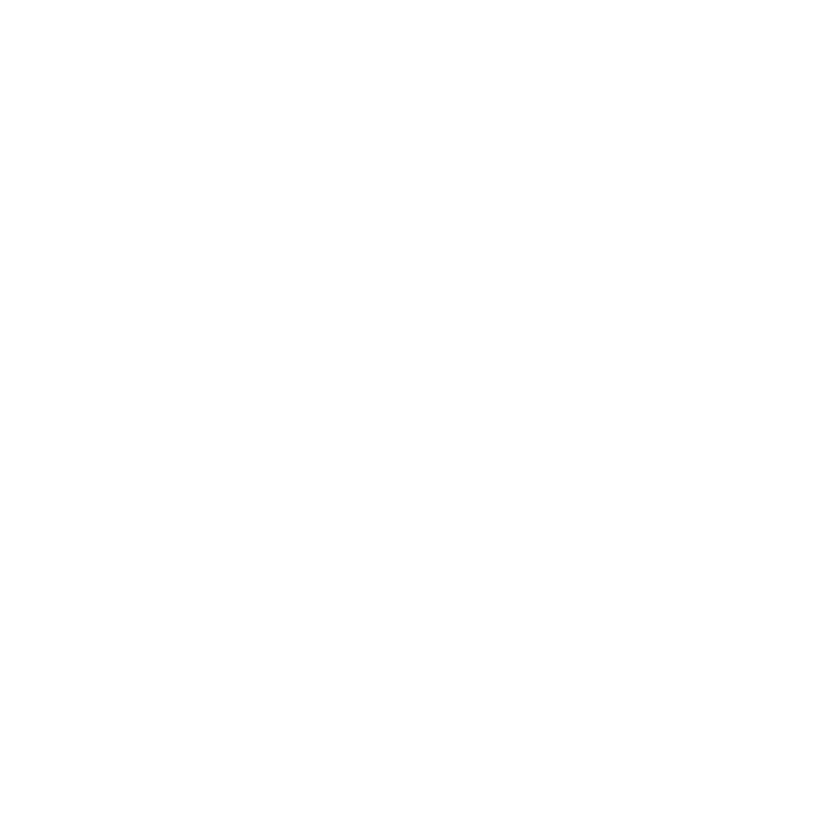

In [38]:
  ggplot(race_graph_df, aes(x = laps)) +
  geom_line(aes(y = driver.1, color = "Driver 1"), size = 1.5) +
  geom_line(aes(y = driver.2, color = "Driver 2"), size = 1.5) +
  geom_line(aes(y = driver.3, color = "Driver 3"), size = 1.5) +
  geom_line(aes(y = driver.4, color = "Driver 4"), size = 1.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") + 
  labs(x = "Laps", y = "Driver Position") +
  scale_color_manual(values = c("Driver 1" = "red", "Driver 2" = "blue", "Driver 3" = "green", "Driver 4" = "purple")) +
  scale_y_reverse() +  # Reverse the y-axis
  theme_minimal()

`geom_smooth()` using formula 'y ~ x'

ERROR while rich displaying an object: Error: stat_smooth requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr

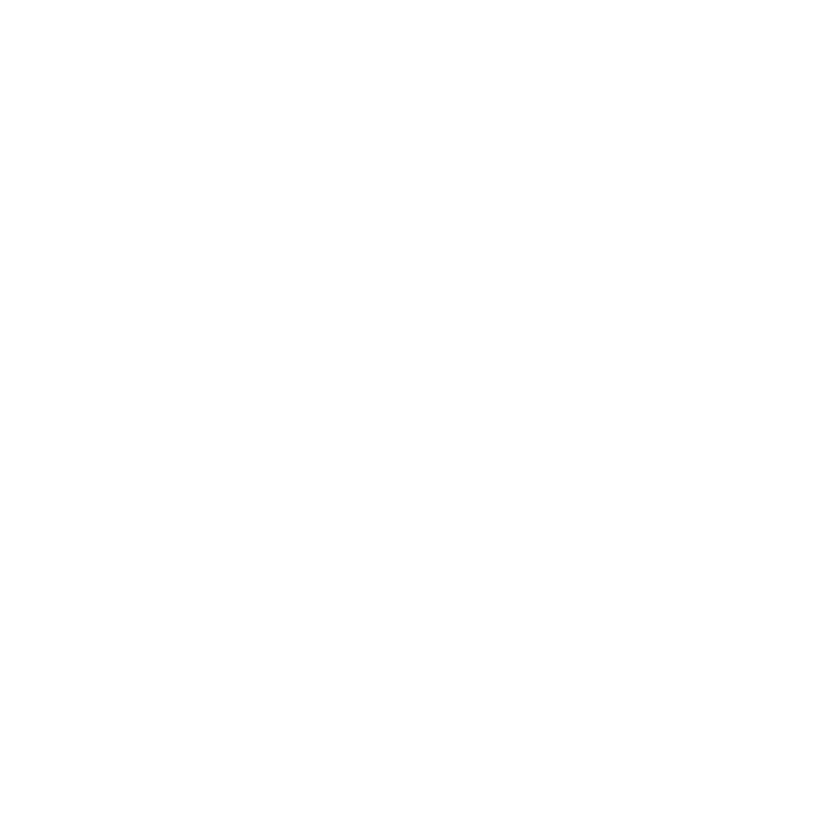

In [39]:
plot2 <- ggplot(race_graph_df, aes(x = laps)) +
  geom_line(aes(y = driver.1, color = "Driver 1"), size = 1.5) +
  geom_line(aes(y = driver.2, color = "Driver 2"), size = 1.5) +
  geom_line(aes(y = driver.3, color = "Driver 3"), size = 1.5) +
  geom_line(aes(y = driver.4, color = "Driver 4"), size = 1.5) +
  geom_smooth(method = "loess", se = FALSE, color = "black") +  # Add smoothed line
  labs(x = "Laps", y = "Driver Position") +
  scale_color_manual(values = c("Driver 1" = "red", "Driver 2" = "blue", "Driver 3" = "green", "Driver 4" = "purple")) +
  scale_y_reverse() +  # Reverse the y-axis
  theme_minimal()

plot2

In [216]:
# Sample data
laps <- 1:10
driver.1 <- c(2, 4, 6, 8, 10, 12, 14, 16, 18, 20)
driver.2 <- c(1, 3, 5, 7, 9, 11, 13, 15, 17, 19)

# Create a data frame
data <- data.frame(laps, driver.1, driver.2)

# Create a ggplot2 plot
p <- ggplot(data, aes(x = laps)) +
  geom_line(aes(y = driver.1, color = "Driver 1")) +
  geom_line(aes(y = driver.2, color = "Driver 2")) +
  labs(x = "Laps", y = "Driver Position") +
  scale_color_manual(values = c("Driver 1" = "red", "Driver 2" = "blue")) +
  theme_minimal()

# Create an animation with changing y-coordinates
animation <- p +
  transition_states(laps, transition_length = 2, state_length = 1) +
  enter_fade() +
  exit_fade()

# Render and play the animation
animate(animation, nframes = 100, fps = 10)


ERROR: Error in rep(seq_len(nrow(polygon)), splits + 1): invalid 'times' argument


In [212]:
plot2 + transition_reveal(as.integer(laps))
anim_save("race.gif")

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing miss

In [147]:
install.packages('transformr')

also installing the dependencies 'proxy', 'e1071', 'wk', 'classInt', 's2', 'units', 'sf', 'lpSolve'





  There are binary versions available but the source versions are later:
           binary source needs_compilation
proxy      0.4-25 0.4-27              TRUE
e1071       1.7-6 1.7-13              TRUE
wk          0.4.1  0.8.0              TRUE
classInt    0.4-3 0.4-10              TRUE
s2          1.0.4  1.1.4              TRUE
units       0.7-1  0.8-4              TRUE
sf          0.9-8 1.0-14              TRUE
lpSolve    5.6.15 5.6.19              TRUE
transformr  0.1.3  0.1.4              TRUE

  Binaries will be installed
package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'wk' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 's2' successfully unpacked and MD5 sums checked
package 'units' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked
package 'lpSolve' successfully unpacked and MD5 sums checke

In [148]:
library('transformr')

Warning message:
"package 'transformr' was built under R version 3.6.3"


In [161]:
p <- ggplot(race_graph_df, aes(x = laps)) +
  geom_line(aes(y = driver.1, color = "Driver 1")) +
  geom_line(aes(y = driver.2, color = "Driver 2")) +
  geom_line(aes(y = driver.18, color = "Driver 3")) +
  geom_line(aes(y = driver.19, color = "Driver 4")) +
  labs(x = "Laps", y = "Driver Position") +
  scale_color_manual(values = c("Driver 1" = "red", "Driver 2" = "blue", "Driver 3" = "green", "Driver 4" = "purple")) +
  scale_y_reverse() +  # Reverse the y-axis
  theme_minimal()

# Create the animation
animation <- p +
  transition_states(laps, transition_length = 2, state_length = 1) +
  enter_fade() +
  exit_fade()

# Render and play the animation
animate(animation, nframes = 100, fps = 10)


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



In [163]:
shorter_race_df <- race_graph_df[1:5]

In [208]:
options(
  repr.plot.width = 15,    # Width in inches
  repr.plot.height = 15    # Height in inches
)

In [164]:
# Convert the data frame to long format
race_graph_df_long <- shorter_race_df %>%
  pivot_longer(cols = starts_with("driver."), names_to = "Driver", values_to = "Position")

# Create the line plot with animation
p <- ggplot(race_graph_df_long, aes(x = laps, y = Position, color = Driver)) +
  geom_line() +
  labs(x = "Laps", y = "Driver Position") +
  scale_color_manual(values = c("Driver 1" = "red", "Driver 2" = "blue", "Driver 3" = "green", "Driver 4" = "purple")) +
  scale_y_reverse() +  # Reverse the y-axis
  theme_minimal()

# Create the animation
animation <- p +
  transition_states(laps, transition_length = 2, state_length = 1) +
  enter_fade() +
  exit_fade()

# Render and play the animation
animate(animation, nframes = 100, fps = 10, end_pause = 10)


ERROR: Error in rep(seq_len(nrow(polygon)), splits + 1): invalid 'times' argument


In [59]:
race_graph_df %>% mutate('LEC' <- )

In [56]:
race_graph_df

laps
<int>
1
2
3
4
5
6
7
8
9


In [75]:
ls <- c()


In [76]:
append(ls, a)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53

In [77]:
ls

NULL

In [89]:
page 

{html_document}
<html id="ctl00_html" lang="en">
[1] <head>\n<!-- Google Analytics --><!-- Global site tag (gtag.js) - Google  ...
[2] <body>\r\n  <form name="aspnetForm" method="post" action="/en/2022/italie ...

In [172]:
scores_df_header <- page %>% html_node('.datatable') %>% html_table(header = FALSE)

In [98]:
scores_df_header[1, ]

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,...,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20


In [149]:
namespos

[1] "LEC1"  "RUS2"  "NOR3"  "RIC4"  "GAS5"  "ALO6"  "VER7"  "DEV8"  "ZHO9" 
[10] "LAT10" "VET11" "STR12" "PER13" "OCO14" "BOT15" "MAG16" "MSC17" "SAI18"
[19] "HAM19" "TSU20"

In [173]:
col = c(0:20)

In [174]:
names(scores_df_header) <- col

In [175]:
names_pos

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [176]:
for (i in 2:21){
    scores_df_header[[i]] <- mapvalues(scores_df_header[[i]], from = namespos, to = names)
}

The following `from` values were not present in `x`: RUS2, NOR3, RIC4, GAS5, ALO6, VER7, DEV8, ZHO9, LAT10, VET11, STR12, PER13, OCO14, BOT15, MAG16, MSC17, SAI18, HAM19, TSU20

The following `from` values were not present in `x`: LEC1, NOR3, RIC4, GAS5, ALO6, VER7, DEV8, ZHO9, LAT10, VET11, STR12, PER13, OCO14, BOT15, MAG16, MSC17, SAI18, HAM19, TSU20

The following `from` values were not present in `x`: LEC1, RUS2, RIC4, GAS5, ALO6, VER7, DEV8, ZHO9, LAT10, VET11, STR12, PER13, OCO14, BOT15, MAG16, MSC17, SAI18, HAM19, TSU20

The following `from` values were not present in `x`: LEC1, RUS2, NOR3, GAS5, ALO6, VER7, DEV8, ZHO9, LAT10, VET11, STR12, PER13, OCO14, BOT15, MAG16, MSC17, SAI18, HAM19, TSU20

The following `from` values were not present in `x`: LEC1, RUS2, NOR3, RIC4, ALO6, VER7, DEV8, ZHO9, LAT10, VET11, STR12, PER13, OCO14, BOT15, MAG16, MSC17, SAI18, HAM19, TSU20

The following `from` values were not present in `x`: LEC1, RUS2, NOR3, RIC4, GAS5, VER7, DEV8, ZHO9, LAT10, VE

In [177]:
scores_df_header

0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,LEC,RUS,NOR,RIC,GAS,ALO,VER,DEV,ZHO,...,VET,STR,PER,OCO,BOT,MAG,MSC,SAI,HAM,TSU
1,LEC,RUS,RIC,VER,GAS,NOR,ALO,DEV,ZHO,...,STR,MAG,OCO,LAT,PER,SAI,MSC,TSU,HAM,BOT
2,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,LAT,PER,TSU,HAM,MSC,BOT
3,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,MAG,SAI,PER,LAT,TSU,HAM,MSC,BOT
4,LEC,RUS,VER,RIC,GAS,NOR,ALO,DEV,ZHO,...,VET,OCO,SAI,PER,MAG,LAT,TSU,HAM,MSC,BOT
5,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,SAI,VET,OCO,PER,MAG,LAT,TSU,HAM,MSC,BOT
6,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,STR,VET,PER,OCO,MAG,LAT,TSU,HAM,MSC,BOT
7,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,ZHO,...,STR,VET,OCO,MAG,TSU,LAT,HAM,PER,MSC,BOT
8,LEC,VER,RUS,RIC,GAS,NOR,ALO,DEV,SAI,...,STR,VET,OCO,TSU,MAG,HAM,LAT,MSC,BOT,PER


In [168]:
for (i in 2:21){
    scores_df_header[[i]] <- mapvalues(scores_df_header[[i]], from = names, to = names_pos)
}

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, LAT, VET, STR, PER, OCO, BOT, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO,

In [169]:
names

[1] "LEC" "RUS" "NOR" "RIC" "GAS" "ALO" "VER" "DEV" "ZHO" "LAT" "VET" "STR"
[13] "PER" "OCO" "BOT" "MAG" "MSC" "SAI" "HAM" "TSU"

In [170]:
names_pos

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [171]:
scores_df_header

0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,1,2,4,7,5,3,6,8,9,...,12,16,14,10,13,18,17,20,19,15
2,1,2,7,4,5,3,6,8,9,...,11,14,16,18,10,13,20,19,17,15
3,1,2,7,4,5,3,6,8,9,...,11,14,16,18,13,10,20,19,17,15
4,1,2,7,4,5,3,6,8,9,...,11,14,18,13,16,10,20,19,17,15
5,1,7,2,4,5,3,6,8,9,...,18,11,14,13,16,10,20,19,17,15
6,1,7,2,4,5,3,6,8,9,...,12,11,13,14,16,10,20,19,17,15
7,1,7,2,4,5,3,6,8,9,...,12,11,14,16,20,10,19,13,17,15
8,1,7,2,4,5,3,6,8,18,...,12,11,14,20,16,19,10,17,15,13


In [6]:
#define function to catch integer(0)
integer0_test <- function(data) {
 
  if(identical(data, integer(0))) {
    return(0)
  }

  else {
    return(data)
  }

}

In [136]:
scores_df_header %>% nrow()

[1] 54

In [139]:
table_without_laps

LEC1,RUS2,NOR3,RIC4,GAS5,ALO6,VER7,DEV8,ZHO9,LAT10,VET11,STR12,PER13,OCO14,BOT15,MAG16,MSC17,SAI18,HAM19,TSU20
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,4,7,5,3,6,8,9,11,12,16,14,10,13,18,17,20,19,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,10,13,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,16,18,13,10,20,19,17,15
1,2,7,4,5,3,6,8,9,12,11,14,18,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,12,18,11,14,13,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,13,14,16,10,20,19,17,15
1,7,2,4,5,3,6,8,9,18,12,11,14,16,20,10,19,13,17,15
1,7,2,4,5,3,6,8,18,9,12,11,14,20,16,19,10,17,15,13
1,7,2,4,5,3,6,18,8,9,12,11,14,20,19,16,10,17,15,13


In [178]:
scores_df_header <- scores_df_header[-1]

In [179]:
names

[1] "LEC" "RUS" "NOR" "RIC" "GAS" "ALO" "VER" "DEV" "ZHO" "LAT" "VET" "STR"
[13] "PER" "OCO" "BOT" "MAG" "MSC" "SAI" "HAM" "TSU"

In [5]:
overlap <- 0
df <- data.frame()
for (name in names){
    for (i in 1:53){
        a <- which(scores_df_header[i, ] == name) - which(scores_df_header[i+1, ] == name)
        a <- integer0_test(a)
        if (a > 0){
            overlap <- overlap + a
        }
    }
    df <- rbind(df, c(name, overlap))
    overlap <- 0
    a <- 0
}

ERROR: Error in for (name in names) {: invalid for() loop sequence


In [184]:
scores_df_header %>% ncol()

[1] 20

In [185]:
df

X.LEC.,X.2.
<chr>,<chr>
LEC,2
RUS,2
NOR,7
RIC,7
GAS,9
ALO,2
VER,7
DEV,6
ZHO,8


In [189]:
names_pos

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [29]:
total_overlaps <- function(page){
    suppressMessages({
#     url <- sprintf('https://www.statsf1.com/%s/tour-par-tour.aspx', df$Links[df$Circuits == id])
#     url <- bow(url)
#     page <- scrape(url, query=list(t="semi-soft", per_page=100))

    scores_df_header <- page %>% html_node('.datatable') %>% html_table(header = FALSE)
    scores_df <- page %>% html_node('.datatable') %>% html_table(header = FALSE)
    names <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_text2()
    names <- names[-1]
    namespos <- as.character(as.vector(scores_df[1, ]))
    namespos <- namespos[-1]

    titles <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_attr('title')
    titles <- titles[-1]
    titles <- c("Laps", titles)
    
    laps <- (scores_df_header %>% nrow()) - 1
        
    names(scores_df_header) <- titles

    for (i in 2:length(titles)){
        scores_df_header[[i]] <- mapvalues(scores_df_header[[i]], from = namespos, to = names)
    }

    scores_df_header <- scores_df_header[-1]
    
    overlap <- 0
    df <- data.frame()
    for (name in names){
        for (i in 1:laps){
            a <- which(scores_df_header[i, ] == name) - which(scores_df_header[i+1, ] == name)
            a <- integer0_test(a)
            if (a > 0){
                overlap <- overlap + a
            }
        }
        df <- rbind(df, c(name, overlap))
        overlap <- 0
        a <- 0
    }
    df <- cbind(df, Id = names)
    names(df) <- c('Driver', 'Overlaps', 'DrID')
    df[[1]] <- mapvalues(df[[1]], from=names, to=titles[-1])
    return(df)
        })
    }

In [48]:
race <- total_overlaps(page)

In [213]:
titles %>% length()

[1] 21

In [196]:
names

[1] "LEC" "RUS" "NOR" "RIC" "GAS" "ALO" "VER" "DEV" "ZHO" "LAT" "VET" "STR"
[13] "PER" "OCO" "BOT" "MAG" "MSC" "SAI" "HAM" "TSU"

In [ ]:
names <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_text()
names <- names[-1]

In [ ]:
namespos <- as.character(as.vector(scores_df[1, ]))
namespos <- namespos[-1]

In [ ]:
titles <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_attr('title')

titles <- titles[-1]
titles <- c("Laps", titles)

In [9]:
url <- 'https://www.statsf1.com/en/2022/italie/tour-par-tour.aspx'
url <- bow(url)
page <- scrape(url, query=list(t="semi-soft", per_page=100))

In [33]:
mod_total_overlaps <- function(page, vector){
    suppressMessages({
#     url <- sprintf('https://www.statsf1.com/%s/tour-par-tour.aspx', df$Links[df$Circuits == id])
#     url <- bow(url)
#     page <- scrape(url, query=list(t="semi-soft", per_page=100))
    scores_df <- page %>% html_node('.datatable') %>% html_table(header = FALSE)
    scores_df_header <- page %>% html_node('.datatable') %>% html_table(header = FALSE)

    names <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_text()
    names <- names[-1]

    namespos <- as.character(as.vector(scores_df[1, ]))
    namespos <- namespos[-1]

    titles <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_attr('title')
    titles <- titles[-1]
    titles <- c("Laps", titles)
    
    laps <- (scores_df_header %>% nrow()) - 1
        
    names(scores_df_header) <- titles

    for (i in 2:length(titles)){
        scores_df_header[[i]] <- mapvalues(scores_df_header[[i]], from = namespos, to = names)
    }

    scores_df_header <- scores_df_header[-1]
    names_pos <- c(1:length(names))
    did <- 0
    got <- 0
    vector_number <- mapvalues(vector, from = names, to = names_pos)
    
    vector_number <- sort(vector_number)
    vector <- mapvalues(vector_number, from = names_pos, to = names)
    for (i in 1:laps){
        previous_lap <- which(scores_df_header[i, ] == vector[1]) - which(scores_df_header[i, ] == vector[2])
        next_lap <- which(scores_df_header[i + 1, ] == vector[1]) - which(scores_df_header[i + 1, ] == vector[2])
        previous_lap  <- integer0_test(previous_lap)
        next_lap <- integer0_test(next_lap)
        if (previous_lap < 0 & next_lap > 0) {
            did <- did + 1  
        }
        else if (previous_lap > 0 && next_lap < 0) {
            got <- got + 1
        }
    }
        
    headov <- data.frame(Driver = '')
    return(c(got, did))
#     print(sprintf('%s overtakes %s %d time(s)', vector[1], vector[2], got))
#     print(sprintf('%s overtakes %s %d time(s)', vector[2], vector[1], did))
        })
    }

In [35]:
vals <- mod_total_overlaps(page, c('LAT', 'BOT'))

In [37]:
vals[2]

[1] 2

In [45]:
testf <- function(){
    vals <- mod_total_overlaps(page, c('LAT', 'BOT'))
    b <- 'asd'
    c <- 'aawe'
    return(c(vals, b, c))
}

In [47]:
testf()

[1] "1"    "2"    "asd"  "aawe"

In [221]:
overlapping <- function(vector, names, names_pos, table){
    
    did <- 0
    got <- 0
    vector_number <- mapvalues(vector, from = names, to = names_pos)
    vector_number <- sort(vector_number)
    vector <- mapvalues(vector_number, from = names_pos, to = names)
    for (i in 1:53){
        previous_lap <- which(table_without_laps[i, ] == vector_number[1]) - which(table_without_laps[i, ] == vector_number[2])
        next_lap <- which(table_without_laps[i + 1, ] == vector_number[1]) - which(table_without_laps[i + 1, ] == vector_number[2])
        previous_lap  <- integer0_test(previous_lap)
        next_lap <- integer0_test(next_lap)
        if (previous_lap < 0 & next_lap > 0) {
            did <- did + 1  
        }
        else if (previous_lap > 0 && next_lap < 0) {
            got <- got + 1
        }
    }
    print(sprintf('%s overtakes %s %d time(s)', vector[1], vector[2], got))
    print(sprintf('%s overtakes %s %d time(s)', vector[2], vector[1], did))
}

In [222]:
overlapping(c('LAT', 'BOT'), names ,names_pos, table_without_laps)

The following `from` values were not present in `x`: LEC, RUS, NOR, RIC, GAS, ALO, VER, DEV, ZHO, VET, STR, PER, OCO, MAG, MSC, SAI, HAM, TSU

The following `from` values were not present in `x`: 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20



[1] "LAT overtakes BOT 1 time(s)"
[1] "BOT overtakes LAT 2 time(s)"


In [225]:
names_pos

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [226]:
test <- c(1:length(names))

In [227]:
test

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [49]:
race

Driver,Overlaps,DrID
<chr>,<chr>,<chr>
C.LECLERC,2,LEC
G.RUSSELL,2,RUS
L.NORRIS,7,NOR
D.RICCIARDO,7,RIC
P.GASLY,9,GAS
F.ALONSO,2,ALO
M.VERSTAPPEN,7,VER
N.de VRIES,6,DEV
G.ZHOU,8,ZHO


In [50]:
gfx_race_circuits <- function(year){
  session <- bow(sprintf("https://www.statsf1.com/en/%d.aspx", year), force = TRUE)
  result <- scrape(session, query=list(t="semi-soft", per_page=100))
  driver_links <- result %>% html_nodes('.libelle') %>% html_node('a') %>% html_attr('href')
  driver_names <- result %>% html_nodes('.libelle') %>% html_node('a') %>% html_text2()
  driver_info <- data.frame(Driver = driver_names, Profile = driver_links)

  return(driver_info)
}

In [51]:
toto <- gfx_race_circuits(2022)

In [59]:
toto$Driver <- gsub(x = toto$Driver, pattern = ' ', replacement = '')

In [54]:
full <- race$Driver[race$DrID == 'LEC']

In [55]:
full

[1] "C.LECLERC"

In [60]:
toto$Profile[toto$Driver == full]

[1] "/en/charles-leclerc.aspx"